In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf

In [13]:
df_train = pd.read_csv(r'training.csv')
df_test = pd.read_csv(r'test.csv')
df_valid = pd.read_csv(r'validation.csv')
df_train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [14]:
df_train.info

<bound method DataFrame.info of                                                     text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]>

In [15]:
df_train.label.unique()

array([0, 3, 2, 5, 4, 1])

In [16]:
df_train.label.value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

sadness (0), joy (1), love (2), anger (3), fear (4).

In [17]:
df_train.shape

(16000, 2)

In [18]:
df_train.isnull().sum()

text     0
label    0
dtype: int64

In [19]:
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stopwords = stopwords.words('english')

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
from nltk.stem import WordNetLemmatizer
import re
corpus = []
wn = WordNetLemmatizer()
messages = df_train.copy()

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['text'][i])
    review = review.lower().split()
    review = [wn.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [23]:
df_valid.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,0
1,i feel like i am still looking at a blank canv...,0
2,i feel like a faithful servant,2
3,i am just feeling cranky and blue,3
4,i can have for a treat or if i am feeling festive,1


In [24]:
valid_corpus = []
messages = df_valid.copy()

for i in range(len(messages)):
    review = re.sub('[^a-zA-Z0-9]', ' ', messages['text'][i])
    review = review.lower().split()
    review = [wn.lemmatize(word) for word in review]
    review = ' '.join(review)
    valid_corpus.append(review)

In [25]:
corpus

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who care and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that wa',
 'ive been taking or milligram or time recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel a confused about life a a teenager or a jaded a a year old man',
 'i have been with petronas for year i feel that petronas ha performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirsty',
 'i ha

In [26]:
valid_corpus

['im feeling quite sad and sorry for myself but ill snap out of it soon',
 'i feel like i am still looking at a blank canvas blank piece of paper',
 'i feel like a faithful servant',
 'i am just feeling cranky and blue',
 'i can have for a treat or if i am feeling festive',
 'i start to feel more appreciative of what god ha done for me',
 'i am feeling more confident that we will be able to take care of this baby',
 'i feel incredibly lucky just to be able to talk to her',
 'i feel le keen about the army every day',
 'i feel dirty and ashamed for saying that',
 'i feel bitchy but not defeated yet',
 'i wa dribbling on mum coffee table looking out of the window and feeling very happy',
 'i woke up often got up around am feeling pukey radiation and groggy',
 'i wa feeling sentimental',
 'i walked out of there an hour and fifteen minute later feeling like i had been beaten with a stick and then placed on the rack and stretched',
 'i never stop feeling thankful a to compare with others i c

In [27]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.metrics import FalsePositives, TruePositives, TrueNegatives, FalseNegatives
from tensorflow.keras.utils import to_categorical


In [28]:
s = set()
maxSentLen = 0
for text in corpus:
    l = list(text.split(' '))
    maxSentLen = max(maxSentLen, len(l))
    for word in l:
        s.add(word)

In [29]:
len(s)

13608

In [30]:
maxSentLen

66

In [31]:
vocab_size = 20000

In [32]:
one_hot_sequence = [one_hot(text, vocab_size) for text in corpus]
valid_one_hot_sequence = [one_hot(text, vocab_size) for text in valid_corpus]

In [33]:
sent_length = 70

embedded_docs = pad_sequences(one_hot_sequence, maxlen=sent_length, padding='post')
valid_embedded_docs = pad_sequences(valid_one_hot_sequence, maxlen=sent_length, padding='post')

In [34]:
embedded_docs

array([[ 7881,  4785, 15816, ...,     0,     0,     0],
       [ 7881,  4074,  9156, ...,     0,     0,     0],
       [16231,  6247,  4422, ...,     0,     0,     0],
       ...,
       [ 7881, 15816,  6438, ...,     0,     0,     0],
       [ 7881, 15816,   414, ...,     0,     0,     0],
       [ 7881, 10823,  4422, ...,     0,     0,     0]], dtype=int32)

In [35]:
X_train = np.array(embedded_docs)
y_train = np.array(df_train['label'])
X_valid = np.array(valid_embedded_docs)
y_valid = np.array(df_valid['label'])

print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

(16000, 70) (16000,) (2000, 70) (2000,)


In [36]:
valid_y = to_categorical(y_valid, num_classes=6)
train_y = to_categorical(y_train, num_classes=6)

In [37]:
embedding_vector_features = 100
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_features, input_length = sent_length))
# model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Dropout(0.3))
model.add(LSTM(100))
# model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 100)           2000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 2081006 (7.94 MB)
Trainable params: 2081006 (7.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
print(tf.__version__)

2.15.0


In [40]:
model.compile(loss=CategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, train_y, validation_data=(X_valid, valid_y), batch_size=32, verbose=1, epochs=100)

Epoch 1/100
500/500 [==============================] - 26s 47ms/step - loss: 1.5847 - accuracy: 0.3240 - val_loss: 1.5829 - val_accuracy: 0.3520
Epoch 2/100
500/500 [==============================] - 5s 10ms/step - loss: 1.5775 - accuracy: 0.3324 - val_loss: 1.5860 - val_accuracy: 0.3510
Epoch 3/100
500/500 [==============================] - 4s 9ms/step - loss: 1.5785 - accuracy: 0.3320 - val_loss: 1.5830 - val_accuracy: 0.3520
Epoch 4/100
500/500 [==============================] - 5s 9ms/step - loss: 1.5768 - accuracy: 0.3318 - val_loss: 1.5846 - val_accuracy: 0.3520
Epoch 5/100
500/500 [==============================] - 4s 9ms/step - loss: 1.5760 - accuracy: 0.3334 - val_loss: 1.5830 - val_accuracy: 0.3520
Epoch 6/100
500/500 [==============================] - 5s 9ms/step - loss: 1.5751 - accuracy: 0.3342 - val_loss: 1.5811 - val_accuracy: 0.3520
Epoch 7/100
500/500 [==============================] - 4s 9ms/step - loss: 1.5764 - accuracy: 0.3351 - val_loss: 1.5823 - val_accuracy: 0.3

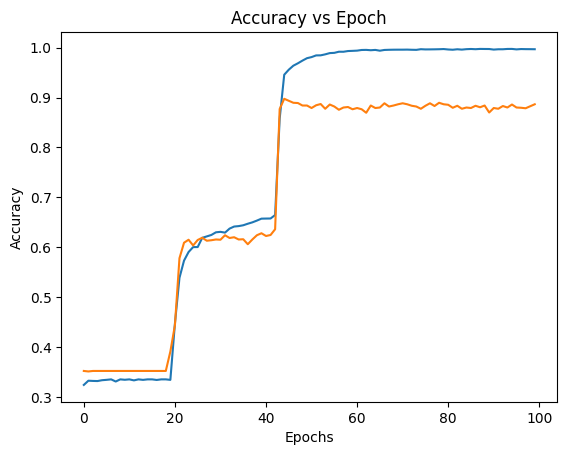

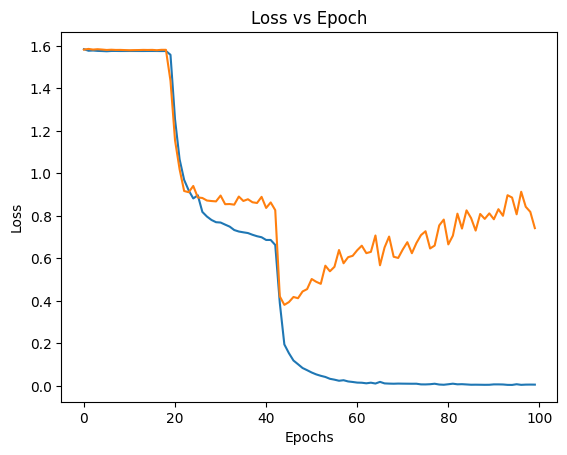

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [43]:
y_valid_pred = model.predict(X_valid)

63/63 [==============================] - 1s 3ms/step


In [44]:
y_valid_pred.shape

(2000, 6)

In [45]:
y_valid_pred = np.argmax(y_valid_pred, axis=-1)

In [46]:
y_valid_pred

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
y_valid

array([0, 0, 2, ..., 1, 1, 1])

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_valid, y_valid_pred)
report = classification_report(y_valid, y_valid_pred)

In [49]:
cm

array([[507,  22,   4,   7,   7,   3],
       [ 14, 652,  27,   5,   5,   1],
       [  7,  30, 135,   3,   1,   2],
       [ 23,   5,   1, 239,   7,   0],
       [ 15,   2,   1,  11, 172,  11],
       [  0,   6,   0,   0,   7,  68]])

In [50]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       550
           1       0.91      0.93      0.92       704
           2       0.80      0.76      0.78       178
           3       0.90      0.87      0.89       275
           4       0.86      0.81      0.84       212
           5       0.80      0.84      0.82        81

    accuracy                           0.89      2000
   macro avg       0.86      0.85      0.86      2000
weighted avg       0.89      0.89      0.89      2000



In [59]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

In [56]:
model.evaluate(X_valid, valid_y)

63/63 [==============================] - 1s 10ms/step - loss: 0.7426 - accuracy: 0.8865


[0.7425625324249268, 0.8865000009536743]

In [60]:
converter._experimental_lower_tensor_list_ops = False
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [62]:
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
converter.inference_input_type = tf.float32
converter.inference_output_type = tf.float32
tf_lit_model = converter.convert()

In [63]:
len(tf_lit_model)

2095888

In [64]:
with open('model.tflite', 'wb') as f:
    f.write(tf_lit_model)